# Import library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Import Cleaned Dataset

In [2]:
a = pd.read_csv("/home/quan/PROJECT/Machine Learning with Biomedical Signals/kaggle_downloads/user_a.csv")
print(a.head(3))
print(a.shape)
print(a.info())

   Class          AF3        AF3.1     AF3.2     AF3.3     AF3.4     AF3.5  \
0    1.0  3569.164550  2063.892754  1.673726  4.444736  0.526209  3.002088   
1    1.0  3568.423670  2063.099248  1.897790  3.728823  1.304186  1.854353   
2    1.0  3568.157929  2062.445859  2.798014  2.574504  1.120537  1.958819   

      AF3.6     AF3.7           F7  ...       F8.6       F8.7          AF4  \
0  1.425022  3.302739  3563.803888  ...  45.468326  72.508750  3701.186330   
1  1.366575  2.546458  3563.560922  ...  36.551948  66.931186  3725.210509   
2  0.982433  2.258622  3563.279981  ...  40.754308  66.816547  3724.417296   

         AF4.1      AF4.2      AF4.3      AF4.4      AF4.5      AF4.6  \
0  2182.676835  18.192418  41.349662  16.004756  42.046467  46.280843   
1  2180.197439   8.820788  38.012788  19.601233  29.431054  38.559351   
2  2176.823208  18.159202  23.612639  14.378291  19.555084  43.210004   

       AF4.7  
0  73.565719  
1  67.470041  
2  67.781924  

[3 rows x 113 column

In [3]:
a.columns.values

array(['Class', 'AF3', 'AF3.1', 'AF3.2', 'AF3.3', 'AF3.4', 'AF3.5',
       'AF3.6', 'AF3.7', 'F7', 'F7.1', 'F7.2', 'F7.3', 'F7.4', 'F7.5',
       'F7.6', 'F7.7', 'F3', 'F3.1', 'F3.2', 'F3.3', 'F3.4', 'F3.5',
       'F3.6', 'F3.7', 'FC5', 'FC5.1', 'FC5.2', 'FC5.3', 'FC5.4', 'FC5.5',
       'FC5.6', 'FC5.7', 'T7', 'T7.1', 'T7.2', 'T7.3', 'T7.4', 'T7.5',
       'T7.6', 'T7.7', 'P7', 'P7.1', 'P7.2', 'P7.3', 'P7.4', 'P7.5',
       'P7.6', 'P7.7', 'O1', 'O1.1', 'O1.2', 'O1.3', 'O1.4', 'O1.5',
       'O1.6', 'O1.7', 'O2', 'O2.1', 'O2.2', 'O2.3', 'O2.4', 'O2.5',
       'O2.6', 'O2.7', 'P8', 'P8.1', 'P8.2', 'P8.3', 'P8.4', 'P8.5',
       'P8.6', 'P8.7', 'T8', 'T8.1', 'T8.2', 'T8.3', 'T8.4', 'T8.5',
       'T8.6', 'T8.7', 'FC6', 'FC6.1', 'FC6.2', 'FC6.3', 'FC6.4', 'FC6.5',
       'FC6.6', 'FC6.7', 'F4', 'F4.1', 'F4.2', 'F4.3', 'F4.4', 'F4.5',
       'F4.6', 'F4.7', 'F8', 'F8.1', 'F8.2', 'F8.3', 'F8.4', 'F8.5',
       'F8.6', 'F8.7', 'AF4', 'AF4.1', 'AF4.2', 'AF4.3', 'AF4.4', 'AF4.5',
       'AF4

# Declare feature vector and target variable

In [4]:
X = a.drop(columns="Class")
y = a["Class"]

In [5]:
X.columns.values

array(['AF3', 'AF3.1', 'AF3.2', 'AF3.3', 'AF3.4', 'AF3.5', 'AF3.6',
       'AF3.7', 'F7', 'F7.1', 'F7.2', 'F7.3', 'F7.4', 'F7.5', 'F7.6',
       'F7.7', 'F3', 'F3.1', 'F3.2', 'F3.3', 'F3.4', 'F3.5', 'F3.6',
       'F3.7', 'FC5', 'FC5.1', 'FC5.2', 'FC5.3', 'FC5.4', 'FC5.5',
       'FC5.6', 'FC5.7', 'T7', 'T7.1', 'T7.2', 'T7.3', 'T7.4', 'T7.5',
       'T7.6', 'T7.7', 'P7', 'P7.1', 'P7.2', 'P7.3', 'P7.4', 'P7.5',
       'P7.6', 'P7.7', 'O1', 'O1.1', 'O1.2', 'O1.3', 'O1.4', 'O1.5',
       'O1.6', 'O1.7', 'O2', 'O2.1', 'O2.2', 'O2.3', 'O2.4', 'O2.5',
       'O2.6', 'O2.7', 'P8', 'P8.1', 'P8.2', 'P8.3', 'P8.4', 'P8.5',
       'P8.6', 'P8.7', 'T8', 'T8.1', 'T8.2', 'T8.3', 'T8.4', 'T8.5',
       'T8.6', 'T8.7', 'FC6', 'FC6.1', 'FC6.2', 'FC6.3', 'FC6.4', 'FC6.5',
       'FC6.6', 'FC6.7', 'F4', 'F4.1', 'F4.2', 'F4.3', 'F4.4', 'F4.5',
       'F4.6', 'F4.7', 'F8', 'F8.1', 'F8.2', 'F8.3', 'F8.4', 'F8.5',
       'F8.6', 'F8.7', 'AF4', 'AF4.1', 'AF4.2', 'AF4.3', 'AF4.4', 'AF4.5',
       'AF4.6', 'AF4

In [6]:
y.value_counts()

Class
1.0    960
2.0    960
0.0    960
Name: count, dtype: int64

# Split data into separate training and test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(2304, 112) (576, 112)
(2304,) (576,)


# Feature Reduction

In [8]:
sensors = ['AF3','F7','F3','FC5','T7','P7','O1','O2','P8','T8','FC6','F4','F8','AF4']
def reduce_features(X):
    X_new = pd.DataFrame()
    for s in sensors:
        cols = [i for i in X.columns if i == s]
        X_new[s + '_mean'] = X[cols].mean(axis=1)
    return X_new

In [9]:
X_train_reduced = reduce_features(X_train)
X_test_reduced = reduce_features(X_test)

# Feature Scaling

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

# XGBoost Classifier

### Default Model

In [11]:
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
model = XGBClassifier(random_state=42, eval_metric=['mlogloss', 'merror'])
evals_result = {}
model.fit(
    X_train_scaled, y_train,
    eval_set=eval_set,
    verbose=False,
    # eval_metric=['mlogloss', 'merror'],
    # evals_result=evals_result
)
evals_result = model.evals_result()
y_pred = model.predict(X_test_scaled)
test_acccuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", test_acccuracy)
print("\nClassification Report: \n", classification_report(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8177083333333334

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.87      0.82      0.85       209
         1.0       0.79      0.82      0.80       183
         2.0       0.80      0.81      0.80       184

    accuracy                           0.82       576
   macro avg       0.82      0.82      0.82       576
weighted avg       0.82      0.82      0.82       576


Confusion Matrix: 
 [[172  15  22]
 [ 17 150  16]
 [  9  26 149]]


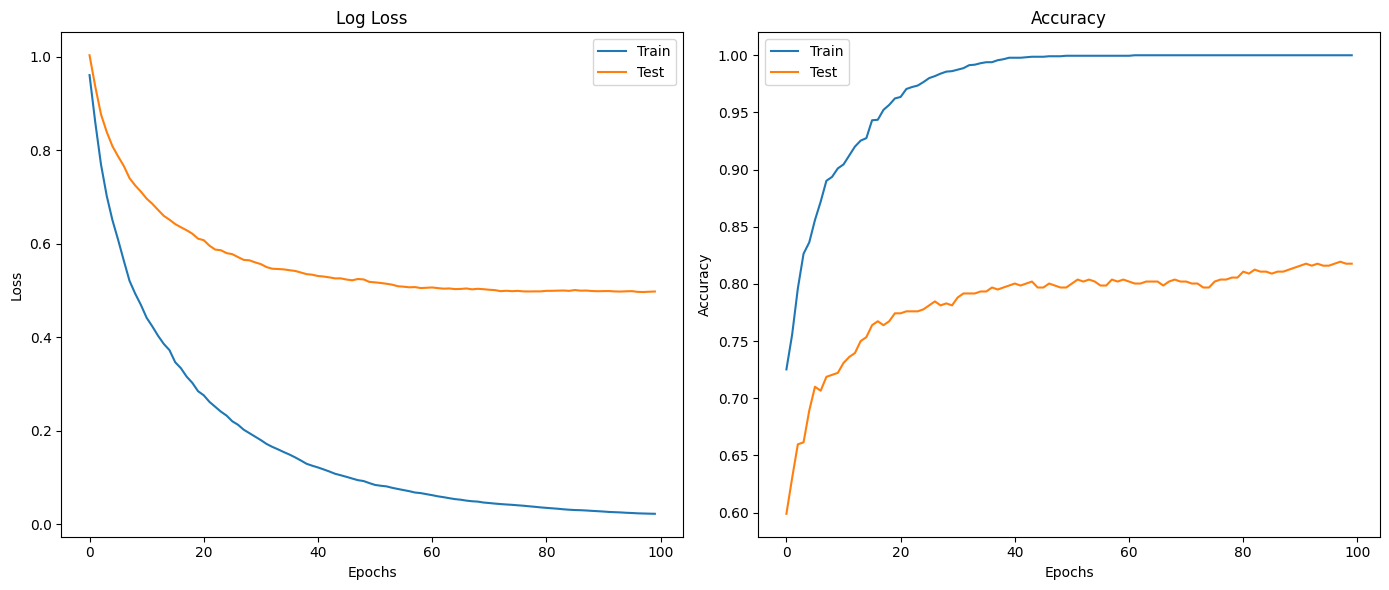

In [12]:

epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(epochs)

plt.figure(figsize=(14, 6))
# Loss
plt.subplot(1,2,1)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Test')
plt.title('Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy (1 - merror)
plt.subplot(1,2,2)
plt.plot(x_axis, 1 - np.array(evals_result['validation_0']['merror']), label='Train')
plt.plot(x_axis, 1 - np.array(evals_result['validation_1']['merror']), label='Test')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

### Model Tuning

In [13]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'reg_alpha': [0, 0.5],
#     'reg_lambda': [1, 2]
# }

In [14]:
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [2, 3],
#     'learning_rate': [0.01],
#     'subsample': [0.8],
#     'colsample_bytree': [0.8],
#     'reg_alpha': [0.5, 1],
#     'reg_lambda': [2, 5]
# }


In [15]:
# xgb = XGBClassifier(
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric=['mlogloss', 'merror'],
#     tree_method='gpu_hist',           # Dùng GPU để xây cây
#     predictor='gpu_predictor',        # Dùng GPU để dự đoán
#     gpu_id=0                          # GPU số 0 (mặc định nếu chỉ có 1 GPU)
# )

# grid_search = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     cv=3,  # 3-fold cross-validation
#     scoring='accuracy',
#     verbose=1,
#     n_jobs=-1  # Dùng toàn bộ CPU
# )
# grid_search.fit(X_train, y_train)
# print("Best parameters found: ", grid_search.best_params_)
# print("Best CV Score:", grid_search.best_score_)

In [16]:
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# test_acccuracy = accuracy_score(y_test, y_pred)
# print("Accuracy after tuning:", test_acccuracy)
# print("\nClassification Report after tuning: \n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix after tuning: \n", confusion_matrix(y_test, y_pred))

In [17]:
# # Huấn luyện lại với eval_set để lấy evals_result
# best_model.fit(
#     X_train, y_train,
#     eval_set=[(X_train, y_train), (X_test, y_test)],
#     verbose=False
# )
# evals_result = best_model.evals_result()

In [18]:
# import matplotlib.pyplot as plt
# import numpy as np

# epochs = len(evals_result['validation_0']['mlogloss'])
# x_axis = range(epochs)

# plt.figure(figsize=(12, 5))

# # Log Loss
# plt.subplot(1, 2, 1)
# plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
# plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Test')
# plt.title('Log Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()

# # Accuracy = 1 - merror
# plt.subplot(1, 2, 2)
# plt.plot(x_axis, 1 - np.array(evals_result['validation_0']['merror']), label='Train')
# plt.plot(x_axis, 1 - np.array(evals_result['validation_1']['merror']), label='Test')
# plt.title('Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [19]:
model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    random_state=42,
    eval_metric=['mlogloss', 'merror'],
    max_depth=3,
    reg_alpha=10,
    reg_lambda=15,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False
)

In [20]:
model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_train_scaled, y_train), (X_test_scaled, y_test)],
    # early_stopping_rounds=20,
    # eval_metric=["mlogloss", "merror"],
    verbose=False,
    # evals_result=evals_result
)

/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:28:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:28:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,"['mlogloss', 'merror']"


In [21]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7083333333333334
Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.70      0.74       209
         1.0       0.66      0.68      0.67       183
         2.0       0.69      0.74      0.72       184

    accuracy                           0.71       576
   macro avg       0.71      0.71      0.71       576
weighted avg       0.71      0.71      0.71       576

Confusion Matrix:
 [[147  30  32]
 [ 29 124  30]
 [ 13  34 137]]


/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [01:28:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/core.py:729: UserWarning: [01:28:06] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.


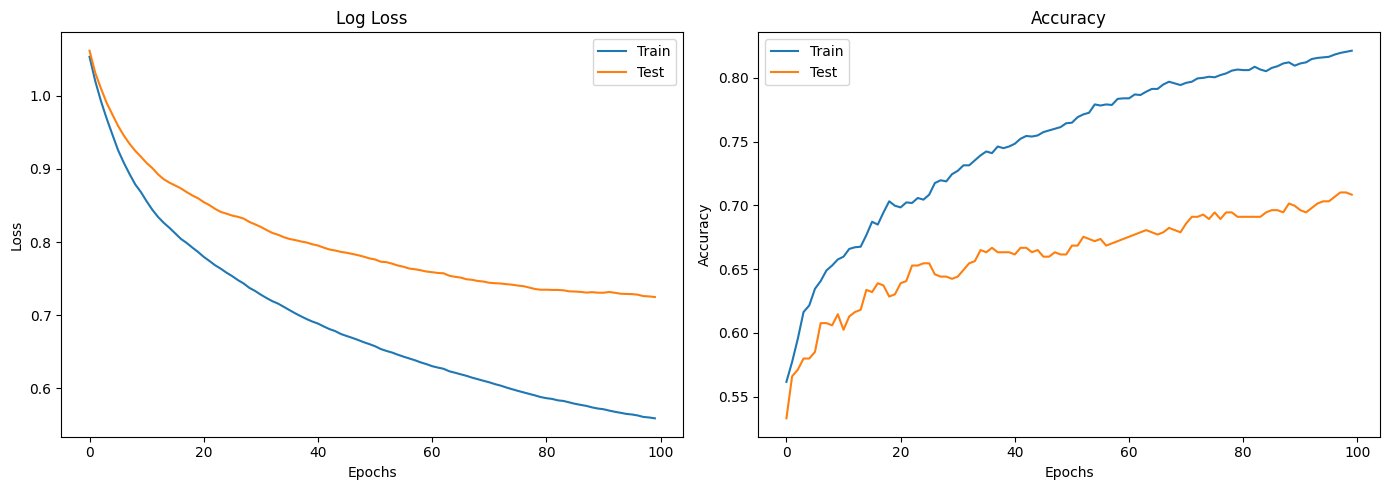

In [22]:
evals_result = model.evals_result()
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(epochs)
plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Test')
plt.title('Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy (1 - merror)
plt.subplot(1, 2, 2)
plt.plot(x_axis, [1 - x for x in evals_result['validation_0']['merror']], label='Train')
plt.plot(x_axis, [1 - x for x in evals_result['validation_1']['merror']], label='Test')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# GridSearch GPU


In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    tree_method='gpu_hist',       # Dùng GPU
    predictor='gpu_predictor',    # Dùng GPU cho predict
    objective='multi:softprob',   # Đa lớp
    num_class=3,                  # Số lớp của bạn là 3
    eval_metric='mlogloss',
    use_label_encoder=False
)

param_grid = {
    'max_depth': [2, 3],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8],
    'reg_alpha': [5, 10, 20],
    'reg_lambda': [10, 20, 30],
}

from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid = GridSearchCV(estimator=xgb_model,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv=cv,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)


print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)
best_model = grid.best_estimator_



Fitting 3 folds for each of 288 candidates, totalling 864 fits


/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:28:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:28:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/core.py:2676: UserWarning: [01:28:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA inst

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 5, 'reg_lambda': 10, 'subsample': 0.8}
Best CV accuracy: 0.7526041666666666


In [29]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82       209
         1.0       0.75      0.75      0.75       183
         2.0       0.73      0.79      0.76       184

    accuracy                           0.78       576
   macro avg       0.78      0.78      0.78       576
weighted avg       0.78      0.78      0.78       576

Test Accuracy: 0.7795138888888888
Confusion Matrix:
 [[165  18  26]
 [ 17 138  28]
 [ 11  27 146]]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Tạo model từ best_params
final_model = XGBClassifier(
    **grid.best_params_,
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    random_state=42,
    eval_metric=['mlogloss', 'merror']
)

# Ghi lại loss/accuracy trong quá trình huấn luyện
evals_result = {}
eval_set = [(X_train, y_train), (X_test, y_test)]

final_model.fit(
    X_train, y_train,
    eval_set=eval_set,
    verbose=False,
    # eval_metric=['mlogloss', 'merror'],
    # evals_result=evals_result
)


/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:42:37] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:42:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,"['mlogloss', 'merror']"


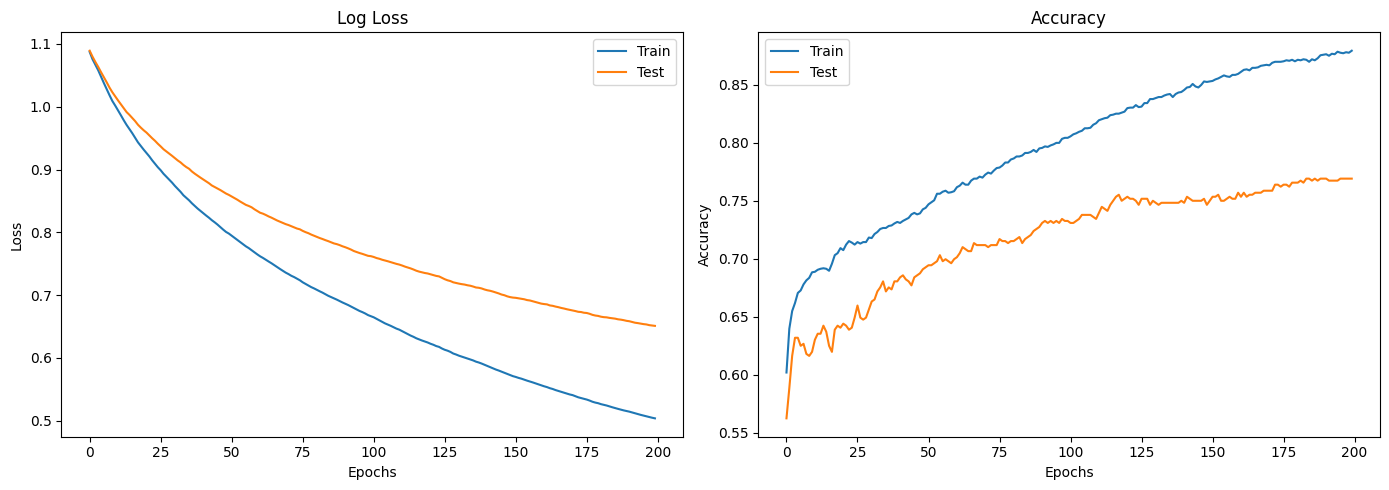

In [30]:
evals_result = final_model.evals_result()
epochs = len(evals_result['validation_0']['mlogloss'])
x_axis = range(epochs)

plt.figure(figsize=(14,5))

# Log Loss
plt.subplot(1,2,1)
plt.plot(x_axis, evals_result['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, evals_result['validation_1']['mlogloss'], label='Test')
plt.title('Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy (1 - merror)
plt.subplot(1,2,2)
plt.plot(x_axis, 1 - np.array(evals_result['validation_0']['merror']), label='Train')
plt.plot(x_axis, 1 - np.array(evals_result['validation_1']['merror']), label='Test')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [32]:
import numpy as np
import pandas as pd

pd.Series(y_train).value_counts(normalize=True)


Class
1.0    0.337240
2.0    0.336806
0.0    0.325955
Name: proportion, dtype: float64

In [33]:
import pandas as pd

X_train_df = pd.DataFrame(X_train, columns=feature_names)  # feature_names là danh sách tên cột
duplicate_columns = X_train_df.columns[X_train_df.columns.duplicated()]
print("Các cột bị trùng tên:", duplicate_columns.tolist())


NameError: name 'feature_names' is not defined

Step 1: Loading data...
Loaded 2880 trials with 14 channels
Step 2: Removing artifacts...
Step 3: Applying bandpass filter...
Step 4: Extracting features...
Extracted features shape: (2880, 182)
Step 5: Splitting data...
Step 6: Normalizing features...
Preprocessing completed!
Training set: (2304, 182)
Test set: (576, 182)
Classes: [0. 1. 2.]


/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


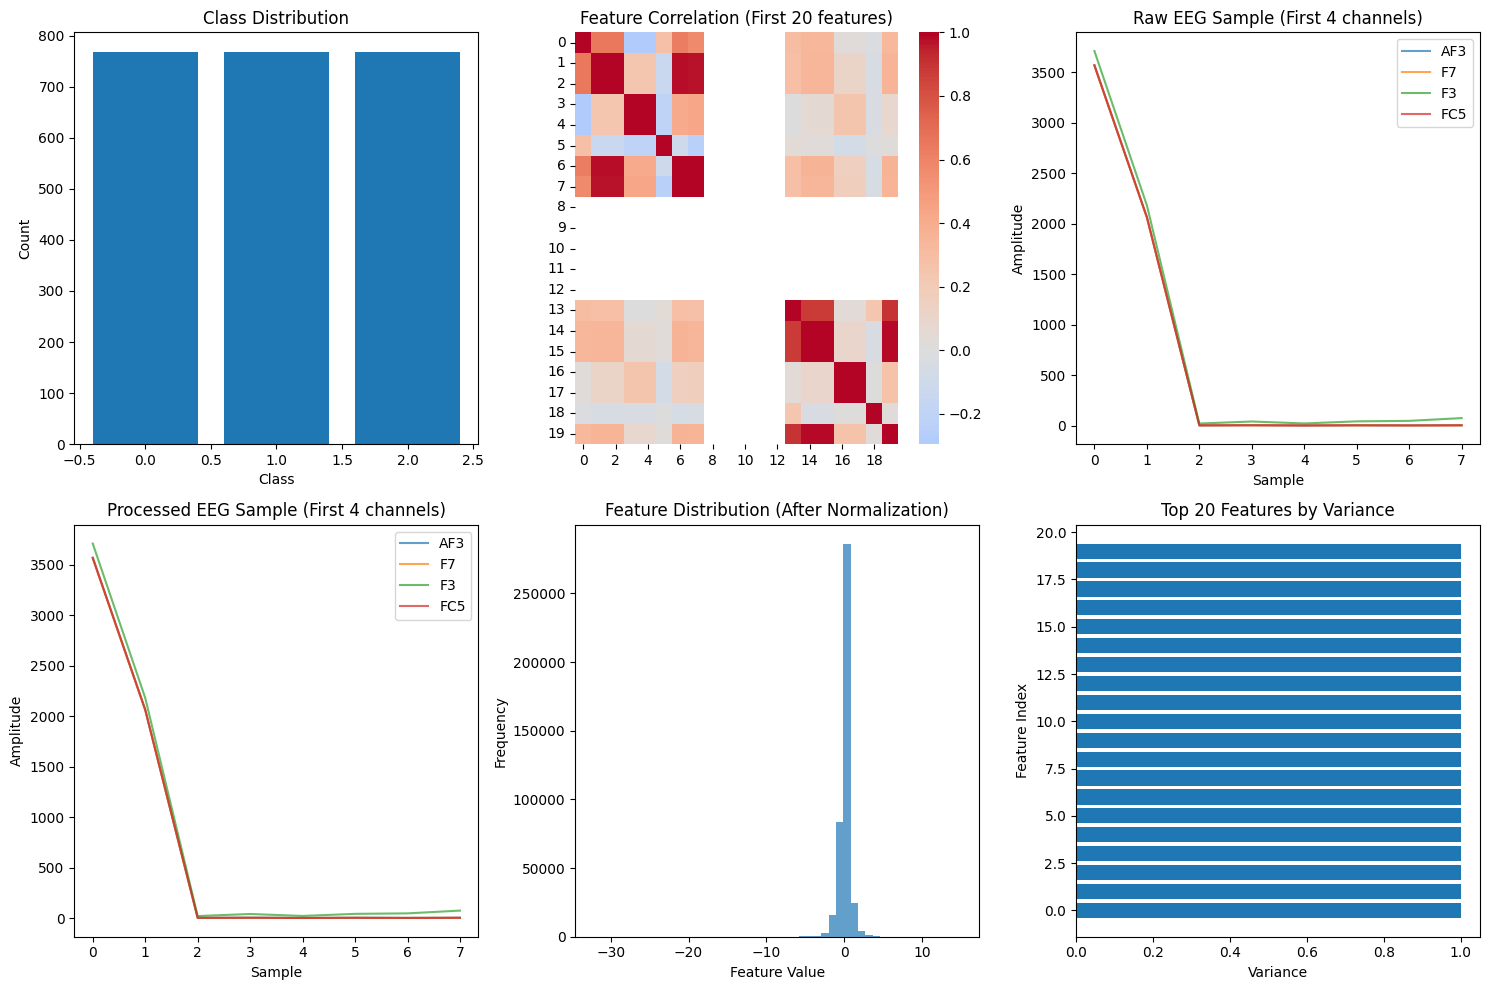


Features shape: (2304, 182)
Sample feature names: ['AF3_mean', 'AF3_std', 'AF3_var', 'AF3_skewness', 'AF3_kurtosis', 'AF3_min', 'AF3_max', 'AF3_range', 'AF3_delta_power', 'AF3_theta_power']

Để sử dụng với DataFrame của bạn:
preprocessor = EEGPreprocessor(sampling_rate=128)
results = preprocessor.preprocess_pipeline(your_dataframe)


In [36]:
import numpy as np
import pandas as pd
from scipy import signal
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

class EEGPreprocessor:
    def __init__(self, sampling_rate=128):
        """
        EEG Data Preprocessor cho EMOTIV EPOC
        
        Args:
            sampling_rate (int): Tần số lấy mẫu của thiết bị EMOTIV EPOC (thường là 128 Hz)
        """
        self.sampling_rate = sampling_rate
        self.channel_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 
                             'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
        self.n_channels = len(self.channel_names)
        
    def load_data(self, data_input):
        """
        Load dữ liệu từ string format hoặc DataFrame
        
        Args:
            data_input: Dữ liệu dạng string với format "Class,channel1,channel2,..." 
                       hoặc pandas DataFrame
        
        Returns:
            tuple: (features, labels)
        """
        # Kiểm tra input type
        if isinstance(data_input, pd.DataFrame):
            # Nếu là DataFrame
            df = data_input.copy()
            
            # Lấy labels từ cột đầu tiên
            labels = df.iloc[:, 0].values
            
            # Lấy features từ các cột còn lại
            feature_data = df.iloc[:, 1:].values
            
            all_features = []
            all_labels = []
            
            for i, row_features in enumerate(feature_data):
                # Reshape thành ma trận channels x samples
                n_samples = len(row_features) // self.n_channels
                if len(row_features) % self.n_channels == 0:
                    channel_data = np.array(row_features).reshape(self.n_channels, n_samples)
                    all_features.append(channel_data)
                    all_labels.append(labels[i])
            
            return np.array(all_features), np.array(all_labels)
        
        else:
            # Nếu là string - code gốc
            lines = data_input.strip().split('\n')
            
            all_features = []
            all_labels = []
            
            for line in lines:
                parts = line.split(',')
                if len(parts) > 1:
                    # Lấy label (class)
                    if parts[0] == 'Class':
                        continue  # Skip header
                    
                    label = float(parts[0])
                    
                    # Lấy features (EEG channels)
                    features = [float(x) for x in parts[1:]]
                    
                    # Reshape thành ma trận channels x samples
                    n_samples = len(features) // self.n_channels
                    if len(features) % self.n_channels == 0:
                        channel_data = np.array(features).reshape(self.n_channels, n_samples)
                        all_features.append(channel_data)
                        all_labels.append(label)
            
            return np.array(all_features), np.array(all_labels)
    
    def remove_artifacts(self, data, threshold_std=3):
        """
        Loại bỏ artifacts bằng cách detect outliers
        
        Args:
            data (np.array): Dữ liệu EEG shape (n_trials, n_channels, n_samples)
            threshold_std (float): Ngưỡng standard deviation để detect outliers
        
        Returns:
            np.array: Dữ liệu đã loại bỏ artifacts
        """
        cleaned_data = []
        
        for trial in data:
            # Tính z-score cho mỗi channel
            trial_cleaned = np.zeros_like(trial)
            for ch in range(trial.shape[0]):
                z_scores = np.abs(zscore(trial[ch]))
                # Thay thế outliers bằng median
                median_val = np.median(trial[ch])
                trial_cleaned[ch] = np.where(z_scores > threshold_std, median_val, trial[ch])
            
            cleaned_data.append(trial_cleaned)
        
        return np.array(cleaned_data)
    
    def apply_bandpass_filter(self, data, low_freq=0.5, high_freq=50):
        """
        Áp dụng bandpass filter để loại bỏ noise
        
        Args:
            data (np.array): Dữ liệu EEG
            low_freq (float): Tần số thấp của filter
            high_freq (float): Tần số cao của filter
        
        Returns:
            np.array: Dữ liệu đã filter
        """
        nyquist = self.sampling_rate / 2
        low = low_freq / nyquist
        high = high_freq / nyquist
        
        # Kiểm tra độ dài tín hiệu
        min_samples = data.shape[2] if len(data.shape) > 2 else data.shape[1]
        
        # Nếu tín hiệu quá ngắn, skip filtering
        if min_samples < 60:  # Cần ít nhất 60 samples cho filter
            print(f"Warning: Signal too short ({min_samples} samples). Skipping bandpass filter.")
            return data
        
        # Thiết kế Butterworth bandpass filter với order thấp hơn
        try:
            # Giảm filter order để phù hợp với tín hiệu ngắn
            filter_order = min(2, max(1, min_samples // 30))
            b, a = signal.butter(filter_order, [low, high], btype='band')
            
            filtered_data = []
            for trial in data:
                trial_filtered = np.zeros_like(trial)
                for ch in range(trial.shape[0]):
                    try:
                        trial_filtered[ch] = signal.filtfilt(b, a, trial[ch])
                    except ValueError:
                        # Nếu vẫn lỗi, sử dụng dữ liệu gốc
                        print(f"Warning: Cannot filter channel {ch}. Using original data.")
                        trial_filtered[ch] = trial[ch]
                filtered_data.append(trial_filtered)
            
            return np.array(filtered_data)
            
        except Exception as e:
            print(f"Warning: Filtering failed ({e}). Using original data.")
            return data
    
    def extract_features(self, data):
        """
        Trích xuất features từ dữ liệu EEG
        
        Args:
            data (np.array): Dữ liệu EEG shape (n_trials, n_channels, n_samples)
        
        Returns:
            np.array: Feature matrix
        """
        n_trials = data.shape[0]
        features_list = []
        
        for trial in data:
            trial_features = []
            
            for ch in range(trial.shape[0]):
                channel_data = trial[ch]
                
                # Statistical features
                mean_val = np.mean(channel_data)
                std_val = np.std(channel_data)
                var_val = np.var(channel_data)
                skewness = self._calculate_skewness(channel_data)
                kurtosis = self._calculate_kurtosis(channel_data)
                
                # Additional simple features
                min_val = np.min(channel_data)
                max_val = np.max(channel_data)
                range_val = max_val - min_val
                
                try:
                    # Power spectral density features (chỉ khi có đủ samples)
                    if len(channel_data) >= 32:  # Cần ít nhất 32 samples cho welch
                        nperseg = min(len(channel_data) // 2, 32)
                        freqs, psd = signal.welch(channel_data, self.sampling_rate, nperseg=nperseg)
                        
                        # Band power features
                        delta_power = self._band_power(freqs, psd, 0.5, 4)    # Delta
                        theta_power = self._band_power(freqs, psd, 4, 8)     # Theta
                        alpha_power = self._band_power(freqs, psd, 8, 13)    # Alpha
                        beta_power = self._band_power(freqs, psd, 13, 30)    # Beta
                        gamma_power = self._band_power(freqs, psd, 30, min(50, self.sampling_rate/2-1))   # Gamma
                    else:
                        # Nếu không đủ samples, sử dụng zero
                        delta_power = theta_power = alpha_power = beta_power = gamma_power = 0.0
                
                except Exception as e:
                    print(f"Warning: PSD calculation failed for channel {ch}: {e}")
                    delta_power = theta_power = alpha_power = beta_power = gamma_power = 0.0
                
                # Combine features
                channel_features = [
                    mean_val, std_val, var_val, skewness, kurtosis,
                    min_val, max_val, range_val,
                    delta_power, theta_power, alpha_power, beta_power, gamma_power
                ]
                
                trial_features.extend(channel_features)
            
            features_list.append(trial_features)
        
        return np.array(features_list)
    
    def _calculate_skewness(self, data):
        """Tính skewness"""
        mean_val = np.mean(data)
        std_val = np.std(data)
        n = len(data)
        return (n / ((n-1) * (n-2))) * np.sum(((data - mean_val) / std_val) ** 3)
    
    def _calculate_kurtosis(self, data):
        """Tính kurtosis"""
        mean_val = np.mean(data)
        std_val = np.std(data)
        n = len(data)
        return (n * (n+1) / ((n-1) * (n-2) * (n-3))) * np.sum(((data - mean_val) / std_val) ** 4) - 3 * (n-1)**2 / ((n-2) * (n-3))
    
    def _band_power(self, freqs, psd, low_freq, high_freq):
        """Tính band power trong khoảng tần số"""
        idx = np.logical_and(freqs >= low_freq, freqs <= high_freq)
        return np.trapz(psd[idx], freqs[idx])
    
    def normalize_features(self, X_train, X_test=None, method='standard'):
        """
        Chuẩn hóa features
        
        Args:
            X_train (np.array): Training features
            X_test (np.array): Test features (optional)
            method (str): 'standard' hoặc 'minmax'
        
        Returns:
            tuple: (X_train_scaled, X_test_scaled, scaler)
        """
        if method == 'standard':
            scaler = StandardScaler()
        elif method == 'minmax':
            scaler = MinMaxScaler()
        else:
            raise ValueError("Method must be 'standard' or 'minmax'")
        
        X_train_scaled = scaler.fit_transform(X_train)
        
        if X_test is not None:
            X_test_scaled = scaler.transform(X_test)
            return X_train_scaled, X_test_scaled, scaler
        else:
            return X_train_scaled, scaler
    
    def preprocess_pipeline(self, data_input, test_size=0.2, random_state=42):
        """
        Pipeline hoàn chỉnh để preprocess dữ liệu EEG
        
        Args:
            data_input: Raw data string hoặc pandas DataFrame
            test_size (float): Tỷ lệ dữ liệu test
            random_state (int): Random seed
        
        Returns:
            dict: Dictionary chứa dữ liệu đã preprocess
        """
        print("Step 1: Loading data...")
        raw_data, labels = self.load_data(data_input)
        print(f"Loaded {len(raw_data)} trials with {raw_data[0].shape[0]} channels")
        
        print("Step 2: Removing artifacts...")
        clean_data = self.remove_artifacts(raw_data)
        
        print("Step 3: Applying bandpass filter...")
        filtered_data = self.apply_bandpass_filter(clean_data)
        
        print("Step 4: Extracting features...")
        features = self.extract_features(filtered_data)
        print(f"Extracted features shape: {features.shape}")
        
        print("Step 5: Splitting data...")
        X_train, X_test, y_train, y_test = train_test_split(
            features, labels, test_size=test_size, random_state=random_state, 
            stratify=labels
        )
        
        print("Step 6: Normalizing features...")
        X_train_scaled, X_test_scaled, scaler = self.normalize_features(
            X_train, X_test, method='standard'
        )
        
        results = {
            'X_train': X_train_scaled,
            'X_test': X_test_scaled,
            'y_train': y_train,
            'y_test': y_test,
            'scaler': scaler,
            'feature_names': self._get_feature_names(),
            'raw_data': raw_data,
            'processed_data': filtered_data
        }
        
        print("Preprocessing completed!")
        print(f"Training set: {X_train_scaled.shape}")
        print(f"Test set: {X_test_scaled.shape}")
        print(f"Classes: {np.unique(labels)}")
        
        return results
    
    def _get_feature_names(self):
        """Tạo tên cho các features"""
        feature_names = []
        stat_features = ['mean', 'std', 'var', 'skewness', 'kurtosis', 'min', 'max', 'range']
        band_features = ['delta', 'theta', 'alpha', 'beta', 'gamma']
        
        for ch_name in self.channel_names:
            for stat in stat_features:
                feature_names.append(f"{ch_name}_{stat}")
            for band in band_features:
                feature_names.append(f"{ch_name}_{band}_power")
        
        return feature_names
    
    def visualize_data(self, results):
        """
        Visualize dữ liệu sau khi preprocess
        
        Args:
            results (dict): Kết quả từ preprocess_pipeline
        """
        plt.figure(figsize=(15, 10))
        
        # Plot 1: Class distribution
        plt.subplot(2, 3, 1)
        unique, counts = np.unique(results['y_train'], return_counts=True)
        plt.bar(unique, counts)
        plt.title('Class Distribution')
        plt.xlabel('Class')
        plt.ylabel('Count')
        
        # Plot 2: Feature correlation heatmap (first 20 features)
        plt.subplot(2, 3, 2)
        corr_matrix = np.corrcoef(results['X_train'][:, :20].T)
        sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
        plt.title('Feature Correlation (First 20 features)')
        
        # Plot 3: Raw EEG data sample
        plt.subplot(2, 3, 3)
        sample_trial = results['raw_data'][0]  # First trial
        for i, ch_name in enumerate(self.channel_names[:4]):  # First 4 channels
            plt.plot(sample_trial[i], label=ch_name, alpha=0.7)
        plt.title('Raw EEG Sample (First 4 channels)')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.legend()
        
        # Plot 4: Processed EEG data sample
        plt.subplot(2, 3, 4)
        sample_processed = results['processed_data'][0]  # First trial
        for i, ch_name in enumerate(self.channel_names[:4]):  # First 4 channels
            plt.plot(sample_processed[i], label=ch_name, alpha=0.7)
        plt.title('Processed EEG Sample (First 4 channels)')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')
        plt.legend()
        
        # Plot 5: Feature distribution
        plt.subplot(2, 3, 5)
        plt.hist(results['X_train'].flatten(), bins=50, alpha=0.7)
        plt.title('Feature Distribution (After Normalization)')
        plt.xlabel('Feature Value')
        plt.ylabel('Frequency')
        
        # Plot 6: Feature importance by variance
        plt.subplot(2, 3, 6)
        feature_vars = np.var(results['X_train'], axis=0)
        top_features_idx = np.argsort(feature_vars)[-20:]
        plt.barh(range(20), feature_vars[top_features_idx])
        plt.title('Top 20 Features by Variance')
        plt.xlabel('Variance')
        plt.ylabel('Feature Index')
        
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Khởi tạo preprocessor
    preprocessor = EEGPreprocessor(sampling_rate=128)
    
    # Nếu bạn có DataFrame, sử dụng trực tiếp:
    # results = preprocessor.preprocess_pipeline(your_dataframe)
    
    # Hoặc với sample data string:
    sample_data = a
    
    results = preprocessor.preprocess_pipeline(sample_data)
    
    # Visualize kết quả
    preprocessor.visualize_data(results)
    
    print("\nFeatures shape:", results['X_train'].shape)
    print("Sample feature names:", results['feature_names'][:10])
    
    # Để sử dụng với DataFrame của bạn:
    print("\n" + "="*50)
    print("Để sử dụng với DataFrame của bạn:")
    print("preprocessor = EEGPreprocessor(sampling_rate=128)")
    print("results = preprocessor.preprocess_pipeline(your_dataframe)")
    print("="*50)

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import xgboost as xgb
# from scipy import interp
import warnings
warnings.filterwarnings('ignore')
interp = np.interp

class XGBoostEEGClassifier:
    def __init__(self, random_state=42):
        """
        XGBoost Classifier cho dữ liệu EEG
        
        Args:
            random_state (int): Random seed for reproducibility
        """
        self.random_state = random_state
        self.model = None
        self.best_params = None
        self.feature_importance = None
        self.cv_scores = None
        
    def tune_hyperparameters(self, X_train, y_train, cv_folds=5, n_jobs=-1):
        """
        Hyperparameter tuning với GridSearchCV
        
        Args:
            X_train: Training features
            y_train: Training labels
            cv_folds (int): Number of CV folds
            n_jobs (int): Number of parallel jobs
        
        Returns:
            dict: Best parameters found
        """
        print("Starting hyperparameter tuning...")
        
        # Define parameter grid
        param_grid = {
            'n_estimators': [100, 150, 200],  # Giảm số trees
            'max_depth': [3, 4],              # Giảm độ sâu cây
            'learning_rate': [0.05, 0.1],     # Giảm learning rate
            'subsample': [0.7, 0.8],          # Giảm subsample
            'colsample_bytree': [0.7, 0.8],   # Giảm feature sampling
            'reg_alpha': [0.5, 1.0, 2.0],     # Tăng L1 regularization
            'reg_lambda': [2.0, 3.0, 5.0],    # Tăng L2 regularization
            'min_child_weight': [3, 5, 7],    # Tăng min samples per leaf
            'gamma': [0.1, 0.2, 0.5]  
        }
        
        # Create XGBoost classifier
        xgb_classifier = xgb.XGBClassifier(
            random_state=self.random_state,
            eval_metric='logloss',
            tree_method='gpu_hist',  # Sử dụng GPU nếu có
            predictor='gpu_predictor',  # Sử dụng GPU cho dự đoán
            gpu_id=0,  # Chỉ định GPU nếu có nhiều GPU
            # early_stopping_rounds=20,
            use_label_encoder=False
        )
        
        # Grid search with cross-validation
        grid_search = GridSearchCV(
            estimator=xgb_classifier,
            param_grid=param_grid,
            cv=StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=self.random_state),
            scoring='accuracy',
            n_jobs=n_jobs,
            verbose=1
        )
        
        # Fit grid search
        grid_search.fit(X_train, y_train)
        
        self.best_params = grid_search.best_params_
        self.model = grid_search.best_estimator_
        
        print(f"Best parameters: {self.best_params}")
        print(f"Best CV score: {grid_search.best_score_:.4f}")
        
        return self.best_params
    
    def train_with_best_params(self, X_train, y_train, X_val=None, y_val=None):
        """
        Train model với best parameters
        
        Args:
            X_train: Training features
            y_train: Training labels
            X_val: Validation features (optional)
            y_val: Validation labels (optional)
        """
        if self.best_params is None:
            print("No hyperparameters found. Using default parameters.")
            self.model = xgb.XGBClassifier(
                random_state=self.random_state,
                eval_metric='mlogloss',
                use_label_encoder=False
            )
        
        # Setup evaluation set if validation data provided
        eval_set = None
        if X_val is not None and y_val is not None:
            eval_set = [(X_train, y_train), (X_val, y_val)]
        
        # Train model
        self.model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=False
        )
        
        # Get feature importance
        self.feature_importance = self.model.feature_importances_
        
        print("Model training completed!")
    
    def cross_validate(self, X_train, y_train, cv_folds=5):
        """
        Perform cross-validation
        
        Args:
            X_train: Training features
            y_train: Training labels
            cv_folds (int): Number of CV folds
        
        Returns:
            dict: CV scores
        """
        print("Performing cross-validation...")
        
        cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=self.random_state)
        
        # Calculate different metrics
        accuracy_scores = cross_val_score(self.model, X_train, y_train, cv=cv, scoring='accuracy')
        f1_scores = cross_val_score(self.model, X_train, y_train, cv=cv, scoring='f1_macro')
        precision_scores = cross_val_score(self.model, X_train, y_train, cv=cv, scoring='precision_macro')
        recall_scores = cross_val_score(self.model, X_train, y_train, cv=cv, scoring='recall_macro')
        
        self.cv_scores = {
            'accuracy': accuracy_scores,
            'f1': f1_scores,
            'precision': precision_scores,
            'recall': recall_scores
        }
        
        print("Cross-validation results:")
        print(f"Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
        print(f"F1-score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
        print(f"Precision: {precision_scores.mean():.4f} ± {precision_scores.std():.4f}")
        print(f"Recall: {recall_scores.mean():.4f} ± {recall_scores.std():.4f}")
        
        return self.cv_scores
    
    def predict(self, X_test):
        """
        Make predictions
        
        Args:
            X_test: Test features
        
        Returns:
            tuple: (predictions, probabilities)
        """
        if self.model is None:
            raise ValueError("Model has not been trained yet!")
        
        predictions = self.model.predict(X_test)
        probabilities = self.model.predict_proba(X_test)
        
        return predictions, probabilities
    
    def evaluate(self, X_test, y_test, class_names=None):
        """
        Evaluate model performance
        
        Args:
            X_test: Test features
            y_test: Test labels
            class_names: List of class names
        
        Returns:
            dict: Evaluation metrics
        """
        predictions, probabilities = self.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, predictions)
        f1 = f1_score(y_test, predictions, average='macro')
        
        # Classification report
        if class_names is None:
            class_names = [f"Class {int(i)}" for i in np.unique(y_test)]
        
        report = classification_report(y_test, predictions, target_names=class_names, output_dict=True)
        
        # Confusion matrix
        cm = confusion_matrix(y_test, predictions)
        
        results = {
            'accuracy': accuracy,
            'f1_score': f1,
            'classification_report': report,
            'confusion_matrix': cm,
            'predictions': predictions,
            'probabilities': probabilities
        }
        
        print("Test Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"F1-score (macro): {f1:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, predictions, target_names=class_names))
        
        return results
    
    def plot_feature_importance(self, feature_names, top_n=20):
        """
        Plot feature importance
        
        Args:
            feature_names: List of feature names
            top_n (int): Number of top features to show
        """
        if self.feature_importance is None:
            print("Feature importance not available. Train the model first.")
            return
        
        # Get top features
        indices = np.argsort(self.feature_importance)[::-1][:top_n]
        top_features = [feature_names[i] for i in indices]
        top_importance = self.feature_importance[indices]
        
        # Plot
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(top_features)), top_importance[::-1])
        plt.yticks(range(len(top_features)), top_features[::-1])
        plt.xlabel('Feature Importance')
        plt.title(f'Top {top_n} Most Important Features')
        plt.tight_layout()
        plt.show()
        
        return dict(zip(top_features, top_importance))
    
    def plot_confusion_matrix(self, cm, class_names=None):
        """
        Plot confusion matrix
        
        Args:
            cm: Confusion matrix
            class_names: List of class names
        """
        if class_names is None:
            class_names = [f"Class {i}" for i in range(len(cm))]
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=class_names, yticklabels=class_names)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()
    
    def plot_roc_curves(self, y_test, probabilities, class_names=None):
        """
        Plot ROC curves for multiclass classification
        
        Args:
            y_test: True labels
            probabilities: Predicted probabilities
            class_names: List of class names
        """
        n_classes = len(np.unique(y_test))
        
        if class_names is None:
            class_names = [f"Class {int(i)}" for i in np.unique(y_test)]
        
        # Binarize the output
        from sklearn.preprocessing import label_binarize
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        plt.figure(figsize=(10, 8))
        
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probabilities[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])
            
            plt.plot(fpr[i], tpr[i], 
                    label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')
        
        plt.plot([0, 1], [0, 1], 'k--', label='Random')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curves - Multiclass Classification')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        
        return roc_auc
    
    def plot_learning_curves(self, X_train, y_train, cv_folds=5):
        """
        Plot learning curves
        
        Args:
            X_train: Training features
            y_train: Training labels
            cv_folds (int): Number of CV folds
        """
        from sklearn.model_selection import learning_curve
        
        train_sizes, train_scores, val_scores = learning_curve(
            self.model, X_train, y_train, cv=cv_folds,
            train_sizes=np.linspace(0.1, 1.0, 10),
            random_state=self.random_state
        )
        
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        
        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Score')
        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
        
        plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Score')
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
        
        plt.xlabel('Training Set Size')
        plt.ylabel('Accuracy Score')
        plt.title('Learning Curves')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    
    def save_model(self, filepath):
        """
        Save trained model
        
        Args:
            filepath (str): Path to save the model
        """
        if self.model is None:
            print("No model to save!")
            return
        
        self.model.save_model(filepath)
        print(f"Model saved to {filepath}")
    
    def load_model(self, filepath):
        """
        Load trained model
        
        Args:
            filepath (str): Path to load the model from
        """
        self.model = xgb.XGBClassifier()
        self.model.load_model(filepath)
        print(f"Model loaded from {filepath}")

# Example usage function
def run_xgboost_pipeline(results, tune_hyperparams=True, quick_mode=False):
    """
    Chạy pipeline hoàn chỉnh với XGBoost
    
    Args:
        results: Kết quả từ preprocessing pipeline
        tune_hyperparams (bool): Có tune hyperparameters không
        quick_mode (bool): Chế độ nhanh (ít tham số hơn)
    
    Returns:
        XGBoostEEGClassifier: Trained classifier
    """
    # Extract data
    X_train = results['X_train']
    X_test = results['X_test']
    y_train = results['y_train']
    y_test = results['y_test']
    feature_names = results['feature_names']
    
    print("="*60)
    print("XGBOOST EEG CLASSIFICATION PIPELINE")
    print("="*60)
    print(f"Training samples: {X_train.shape[0]}")
    print(f"Test samples: {X_test.shape[0]}")
    print(f"Features: {X_train.shape[1]}")
    print(f"Classes: {len(np.unique(y_train))}")
    print("="*60)
    
    # Initialize classifier
    classifier = XGBoostEEGClassifier(random_state=42)
    
    if tune_hyperparams:
        if quick_mode:
            print("Running quick hyperparameter tuning...")
            # Simplified parameter grid for quick testing
            param_grid = {
                'n_estimators': [100, 200],
                'max_depth': [3, 5],
                'learning_rate': [0.1, 0.2],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }
            
            xgb_classifier = xgb.XGBClassifier(
                random_state=42,
                eval_metric='logloss',
                use_label_encoder=False
            )
            
            from sklearn.model_selection import GridSearchCV, StratifiedKFold
            grid_search = GridSearchCV(
                estimator=xgb_classifier,
                param_grid=param_grid,
                cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
                scoring='accuracy',
                n_jobs=-1,
                verbose=1
            )
            
            grid_search.fit(X_train, y_train)
            classifier.best_params = grid_search.best_params_
            classifier.model = grid_search.best_estimator_
            print(f"Best parameters: {classifier.best_params}")
        else:
            # Full hyperparameter tuning
            classifier.tune_hyperparameters(X_train, y_train, cv_folds=5)
    else:
        print("Using default parameters...")
        classifier.model = xgb.XGBClassifier(
            random_state=42,
            eval_metric='logloss',
            use_label_encoder=False,
            n_estimators=200,
            max_depth=5,
            learning_rate=0.1
        )
    
    # Train model
    print("\nTraining model...")
    classifier.train_with_best_params(X_train, y_train, X_test, y_test)
    
    # Cross-validation
    print("\nPerforming cross-validation...")
    cv_scores = classifier.cross_validate(X_train, y_train, cv_folds=5)
    
    # Evaluate on test set
    print("\nEvaluating on test set...")
    class_names = [f"Class {int(i)}" for i in np.unique(y_train)]
    evaluation = classifier.evaluate(X_test, y_test, class_names)
    
    # Visualizations
    print("\nGenerating visualizations...")
    
    # Feature importance
    print("Top important features:")
    top_features = classifier.plot_feature_importance(feature_names, top_n=20)
    
    # Confusion matrix
    classifier.plot_confusion_matrix(evaluation['confusion_matrix'], class_names)
    
    # ROC curves
    roc_auc = classifier.plot_roc_curves(y_test, evaluation['probabilities'], class_names)
    
    # Learning curves
    classifier.plot_learning_curves(X_train, y_train, cv_folds=5)
    
    print("\n" + "="*60)
    print("PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*60)
    
    return classifier

# Quick start example
if __name__ == "__main__":
    print("XGBoost EEG Classifier")
    print("Usage example:")
    print("classifier = run_xgboost_pipeline(results, tune_hyperparams=True, quick_mode=True)")
    print("predictions, probabilities = classifier.predict(X_new)")

XGBoost EEG Classifier
Usage example:
classifier = run_xgboost_pipeline(results, tune_hyperparams=True, quick_mode=True)
predictions, probabilities = classifier.predict(X_new)


In [55]:
classifier = run_xgboost_pipeline(results, tune_hyperparams=True, quick_mode=False)

XGBOOST EEG CLASSIFICATION PIPELINE
Training samples: 2304
Test samples: 576
Features: 182
Classes: 3
Starting hyperparameter tuning...
Fitting 5 folds for each of 3888 candidates, totalling 19440 fits
Best parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 2.0, 'subsample': 0.8}
Best CV score: 0.8264

Training model...


XGBoostError: [09:17:39] /workspace/src/metric/elementwise_metric.cu:361: Check failed: preds.Size() == info.labels.Size() (6912 vs. 2304) : label and prediction size not match, hint: use merror or mlogloss for multi-class classification
Stack trace:
  [bt] (0) /home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x2a6ecc) [0x7c80deaa6ecc]
  [bt] (1) /home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0xd88cf3) [0x7c80df588cf3]
  [bt] (2) /home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x6b3406) [0x7c80deeb3406]
  [bt] (3) /home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(+0x68c280) [0x7c80dee8c280]
  [bt] (4) /home/quan/PROJECT/Machine Learning with Biomedical Signals/.venv/lib/python3.10/site-packages/xgboost/lib/libxgboost.so(XGBoosterEvalOneIter+0x1d6) [0x7c80de9bf6f6]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x86de) [0x7c814e1896de]
  [bt] (6) /lib/x86_64-linux-gnu/libffi.so.8(+0x46cf) [0x7c814e1856cf]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(ffi_call+0x12e) [0x7c814e188a6e]
  [bt] (8) /usr/local/lib/python3.10/lib-dynload/_ctypes.cpython-310-x86_64-linux-gnu.so(+0xd39a) [0x7c814e19b39a]

